Tanító- és teszthalmaz példa, kNN algoritmus feladat train/test bemutatására, kézzel írott számjegyek felismerése kNN-el (felügyelt tanulás), validációs halmaz példa; 10-szeres keresztvalidáció feladat

### Supervised Learning :

It is the learning where the value or result that we want to predict is within the training data (labeled data) and the value which is in data that we want to study is known as Target or Dependent Variable or Response Variable.
All the other columns in the dataset are known as the Feature or Predictor Variable or Independent Variable.

Supervised Learning is classified into two categories:

* Classification: Here our target variable consists of the categories.
* Regression: Here our target variable is continuous and we usually try to find out the line of the curve.


### Train/Test

* Train/Test is a method to measure the accuracy of your model.<br>
* It is called Train/Test because you split the the data set into two sets: a training set and a testing set.<br>
* The usual rate is 80% for training, and 20% for testing.<br>
* Train the model means create the model.<br>
* Test the model means test the accuracy of the model.

### Example (train, test)

In [106]:
import pandas as pd
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [107]:
# label
y= housing.median_income
print(y.head())

# features
x=housing.drop('median_income',axis=1)
x.head()

0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,342200.0,NEAR BAY


In [108]:
# splitting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
 
# printing shapes of testing and training sets :
print("shape of original dataset :", housing.shape)
print("shape of features - training set", x_train.shape)
print("shape of label - training set", y_train.shape)
print("shape of features - testing set", x_test.shape)
print("shape of label - testing set", y_test.shape)

shape of original dataset : (20640, 10)
shape of features - training set (16512, 9)
shape of label - training set (16512,)
shape of features - testing set (4128, 9)
shape of label - testing set (4128,)


The obtained train and test datasets can be used for training machine learning algorithms and testing their accuracy.<br>
Later, we will learn about such algorithms, and this traint/test will be the method for testing them.

### k-nearest neighbor algorithm:

Steps:
1. Choose k
2. Calculate all the distances of the new data point and the other (already classified) points
3. Find the k smallest distances (k points which are closest)
4. Classify the point --- majority voting


This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

Note: It’s very important to have the right k-value when analyzing the dataset to avoid overfitting and underfitting of the dataset.

Using the k-nearest neighbor algorithm we fit the historical data (or train the model) and predict the future.

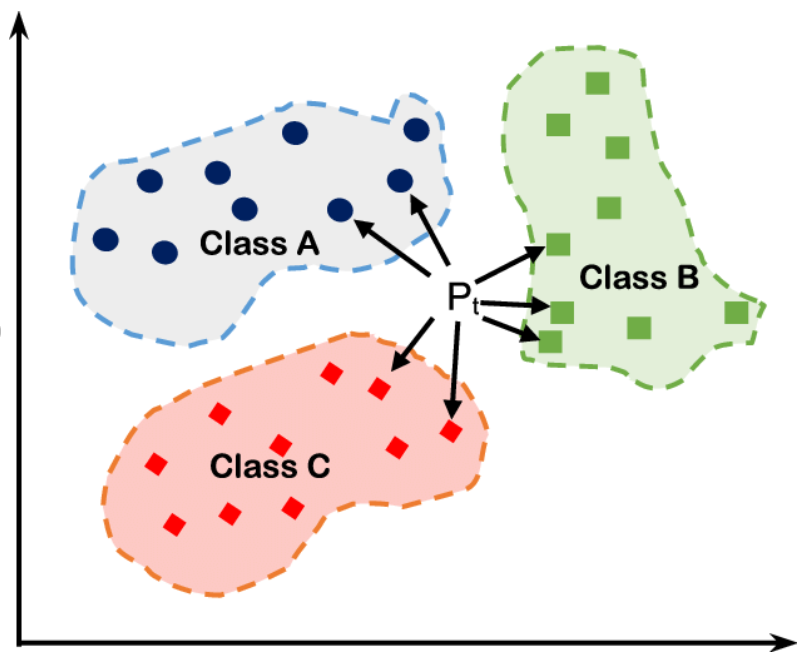

In [5]:
from IPython.display import Image
Image("img/knn.png",width=350)

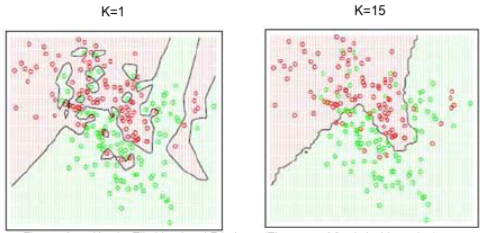

In [6]:
Image("img/knn_k.png",width=450)

### Exercise (k-NN)

In [4]:
# read in the iris data (load it from the built-in package): iris
import pandas as pd



In [12]:
iris=pd.read_csv('iris.csv')

# check the dataset (print it)
iris
# find out what will be the label and the features
# create X (features) and y (label)
x=iris.drop('species', axis=1)
y=iris['species']

In [27]:
# split X and y into training and testing sets: X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

Let's try the knn algorithm with k=1.

In [35]:
# use the KNeighborsClassifier to create the knn model: knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=1)



# fit the model (on the train data)
knn.fit(x_train,y_train)


# do prediction on the X_test dataset: y_pred
y_pred=knn.predict(x_test)


# calculate the accuracy of the model, use the accuracy_score function
acc=accuracy_score(y_test,y_pred)


0.9

Try the algorithm from K=1 to K=25 and record testing accuracy.

In [39]:
# Create an empty list for the scores: scores
scores=[]

# use a loop through the range 1 to 26
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
# create a knn model in each step, fit the model and do prediction
# append the accuracy scores in the list






# print the scores
scores

[0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9]

In [5]:
# plot the relationship between K and testing accuracy
# label the axes




In [4]:
# choose the parameter which seems the best
# create the model with the chosen k


# train the model with X and y (not X_train and y_train)


# make a prediction for an out-of-sample observation


When splitting the data into two datasets: train and test set, it might be a "lucky" partition, that is you get a very good result on the test dataset just by chance.

This problem can be solved by using validation set. The method is the following: <br>
* We will have a train, a validation and a test set
* We train the model on the train set
* We evaluate the model on the validation set AND choose the model which gives the best result on this set
* We evaluate the chosen model on the test dataset (checking whether it gives the same good result, or it was just lucky previously)

This method can be implemented similarly as the train/test method.

What is the problem with this method? We waste lots of train data by using a validation set. We will learn about cross-validation which will solve this problem as well.

### Supervised learning, kNN on digits

In [2]:
from sklearn.datasets import *
import pandas as pd
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digit = load_digits()
def Image_display(i):
    plt.imshow(digit['images'][i],cmap = 'Greys_r')
    plt.show()

In [7]:
digit

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

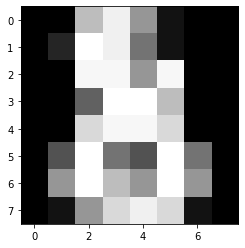

In [9]:
Image_display(1796)

In [16]:
train_x = digit['data'][:1600]
train_y = digit['target'][:1600]
test_x = digit['data'][1600:]
test_y = digit['target'][1600:]
KNN = KNeighborsClassifier(20)
KNN.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

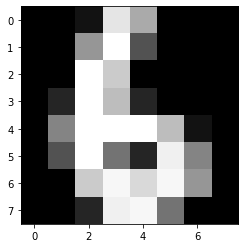

In [17]:
test = np.array(digit['data'][1725])
test1 = test.reshape(1,-1) # -1 refers to finding the correct size 
Image_display(1725)

In [18]:
test1

array([[ 0.,  0.,  1., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  8., 16.,  4.,
         0.,  0.,  0.,  0.,  0., 16., 11.,  0.,  0.,  0.,  0.,  0.,  2.,
        16., 10.,  2.,  0.,  0.,  0.,  0.,  7., 16., 16., 16., 10.,  1.,
         0.,  0.,  4., 16.,  6.,  2., 14.,  7.,  0.,  0.,  0., 11., 15.,
        12., 15.,  8.,  0.,  0.,  0.,  2., 14., 15.,  6.,  0.,  0.]])

In [19]:
print(KNN.predict(test1))

[6]


In [20]:
y_pred=KNN.predict(test_x)
from sklearn.metrics import accuracy_score

accuracy_score(test_y, y_pred, normalize=False)

0.934010152284264

### Cross-validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.<br>
The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

Typical values for k are k=3, k=5, and k=10, with 10 representing the most common value. This is because, given extensive testing, 10-fold cross-validation provides a good balance of low computational cost and low bias in the estimate of model performance as compared to other k values and a single train-test split.



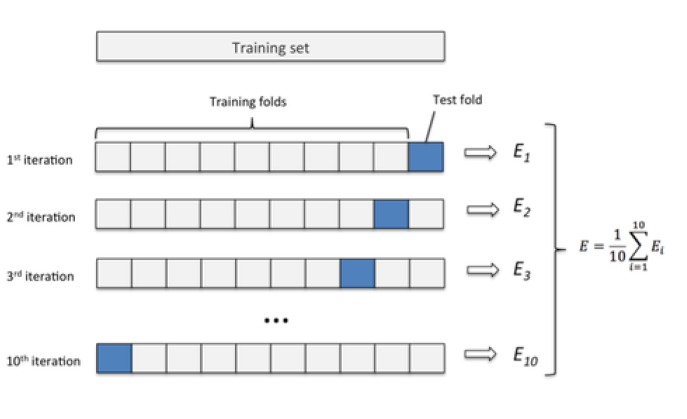

In [129]:
Image("img/cross_val.png",width=450)

### LOOCV

Leave-one-out cross-validation, or LOOCV, is a configuration of k-fold cross-validation where k is set to the number of examples in the dataset.

LOOCV is an extreme version of k-fold cross-validation that has the maximum computational cost. It requires one model to be created and evaluated for each example in the training dataset.



### Example

Imagine we have a data sample with 6 observations:

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

Let's use a value of k=3. That means we will shuffle the data and then split the data into 3 groups. Because we have 6 observations, each group will have an equal number of 2 observations.

For example:

Fold1: [0.5, 0.2]
Fold2: [0.1, 0.3]
Fold3: [0.4, 0.6]

We can then make use of the sample, such as to evaluate the skill of a machine learning algorithm.

Three models are trained and evaluated with each fold given a chance to be the held out test set.

For example:
* Model1: Trained on Fold1 + Fold2, Tested on Fold3
* Model2: Trained on Fold2 + Fold3, Tested on Fold1
* Model3: Trained on Fold1 + Fold3, Tested on Fold2

The models are then discarded after they are evaluated as they have served their purpose.

The skill scores are collected for each model and summarized for use.



### Exercise (cross-validation)

**a)** We will use data from the [UCI database](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). This database stores data of several kind of portugese wine containing their chemical parameters such as sugar content, pH and alcohol content. And there is a data parameter giving a quality score between 0 and 10 for each wine.

* Load the data of the **red wine** from the [database](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/). (Load the data directly from the internet without downloading the file to your computer.) The *quality* column will be the target variable, and the remaining columns the feature variables.
* From this point we would like to consider the exercise as a binary classification task, which infers the following task: Redefine the target variable: let its value to be 0 if the *quality < 6.5* (bad wine), and let its value to be 1 if the *quality $\geq$ 6.5* (good wine). Create independent *numpy arrays* for storing the features and target variables!

**b)** Classification, cross-validation
* Use kNN algorithm for the classification! Determine (with cross-validation with 10 sets) which *k* value of the kNN algorithm gives optimal F-measure. (Investigate the *k* value on a reasonable interval!) <br>
(HINT: Use the *model_selection.cross_val_score* function with *scoring = 'f1'* setting!) 




##### a)

In [6]:
# Import pandas and numpy packages



# Read the red wine data: redwine


# Check the head of the data



In [ ]:
# Create numpy array out of the redwine dataframe: wine_data (HINT: you need the values of the dataframe)


# Check the numpy array


In [100]:
# Convert the values of the numpy array to float type


# Convert the last (target) variable to binary






In [101]:
# Store the features and the target variable separately:
# Store the target values and convert them to int type: quality


# Store the feature values: features


In [7]:
# Print the mean of the quality (target variable), that is check the rate of good and bad wine


##### b)

In [103]:
# Import the KNeighborsClassifier and cross_val_score modules



In [8]:
# Choose the possible values of k in a reasonable way
# As we are doing binary classification, it is reasonable to use odd k values
# Create a list of the k values which you want to check: neighbors


# Check each k in neighbors:
# What F-score is reached in the cross-validation by using kNN with k
# Collect the different cross-validation scores into a list: cv_scores






# Print the cv_scores list


# Which k gives the best result?




